In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


# 그래프 기본 테마 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
# data import
d34 = pd.read_csv('data/d2324.csv')
d34.head() # 110 columns

,revisit_num,satis_overall,satis_food,satis_shop,satis_nature,satis_history,satis_tradition,satis_gallery,satis_kpop,satis_performance,...,lack_info_unknown,collect_site,info_collect,infra,activity,type,main_purpose,interest1,interest2,interest3
0,4,5,5.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,2.0,1.0,6.0,1.0,1,1,2.0,3.0,4.0
1,4,5,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,11.0,6.0,3.0,3.0,3.0,1,2,2.0,9.0,7.0
2,2,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,1,5,NaN,NaN,NaN
3,1,5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,11.0,NaN,4.0,NaN,NaN,1,3,NaN,NaN,NaN
4,3,4,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,...,11.0,NaN,4.0,3.0,2.0,1,2,8.0,3.0,7.0


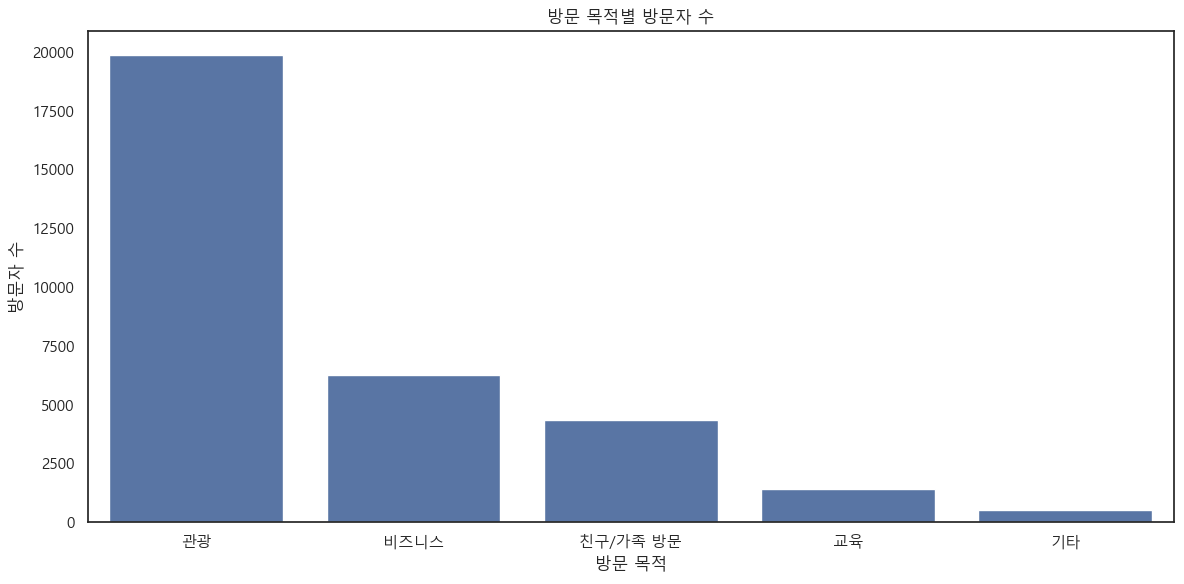

In [3]:
# 방문 목적
d34['purpose'].value_counts()

# purpose
# 여가: 19876
# 사업: 6275
# 방문: 4354
# 교육: 1401
# 기타: 506

purpose_rename = {
    1 : '관광',
    3 : '비즈니스',
    2 : '친구/가족 방문',
    4 : '교육',
    5 : '기타'
}

d34['purpose'] = d34['purpose'].replace(purpose_rename)

mpl.rcParams['font.family'] = ['Malgun Gothic']
mpl.rcParams['font.sans-serif'] = ['Malgun Gothic']
mpl.rcParams['axes.unicode_minus'] = False
sns.set(style="white", font='Malgun Gothic', rc={'axes.unicode_minus':False})

sns.countplot(x='purpose', data=d34, order=d34['purpose'].value_counts().index)
plt.title("방문 목적별 방문자 수", fontname='Malgun Gothic')
plt.xlabel("방문 목적", fontname='Malgun Gothic')
plt.ylabel("방문자 수", fontname='Malgun Gothic')
plt.tight_layout()
plt.show()

In [4]:
print(d34['purpose'].value_counts())
d34['main_purpose'].value_counts()

purpose
관광          19876
비즈니스         6275
친구/가족 방문     4354
교육           1401
기타            506
Name: count, dtype: int64


main_purpose
1    19876
3     6275
2     4354
4     1401
5      506
Name: count, dtype: int64

lack_info1
교통지정보       3898
맛집정보        2591
금융정보        2533
행사정보        2396
방문지정보       1832
통신이용정보      1747
쇼핑정보        1418
숙박정보        1191
한류문화체험정보     980
기타           224
Name: count, dtype: int64
lack_info2
교통지정보       1886
맛집정보        1819
행사정보        1595
방문지정보       1571
금융정보        1477
통신이용정보      1308
쇼핑정보        1116
숙박정보         888
한류문화체험정보     861
기타            47
Name: count, dtype: int64
lack_info3
방문지정보       1225
교통지정보       1205
맛집정보        1158
행사정보        1083
금융정보         978
통신이용정보       866
쇼핑정보         828
숙박정보         709
한류문화체험정보     677
기타            32
Name: count, dtype: int64


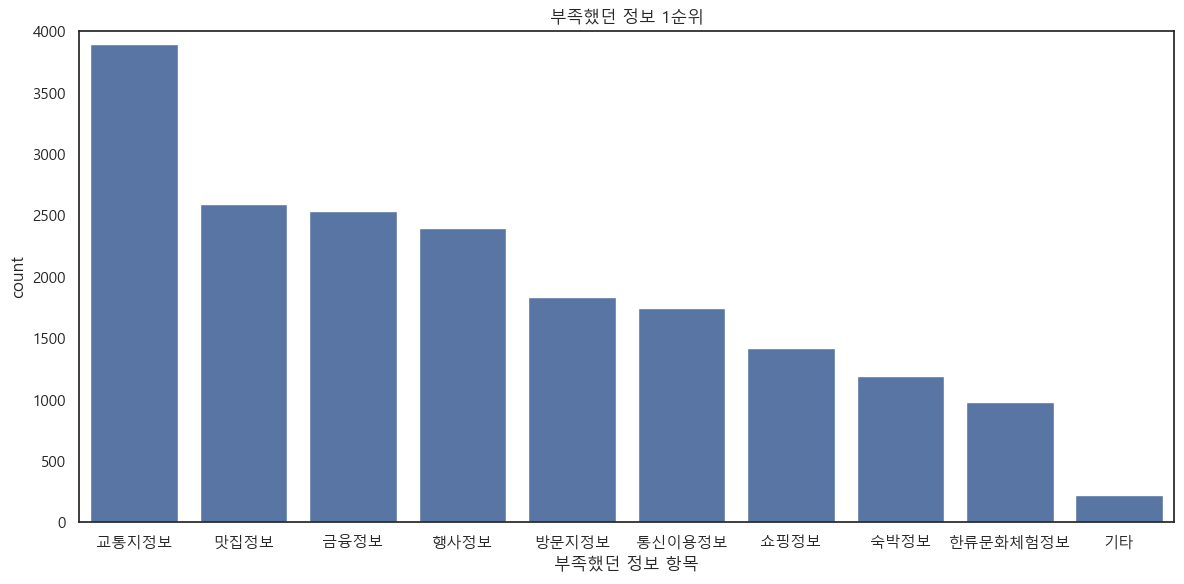

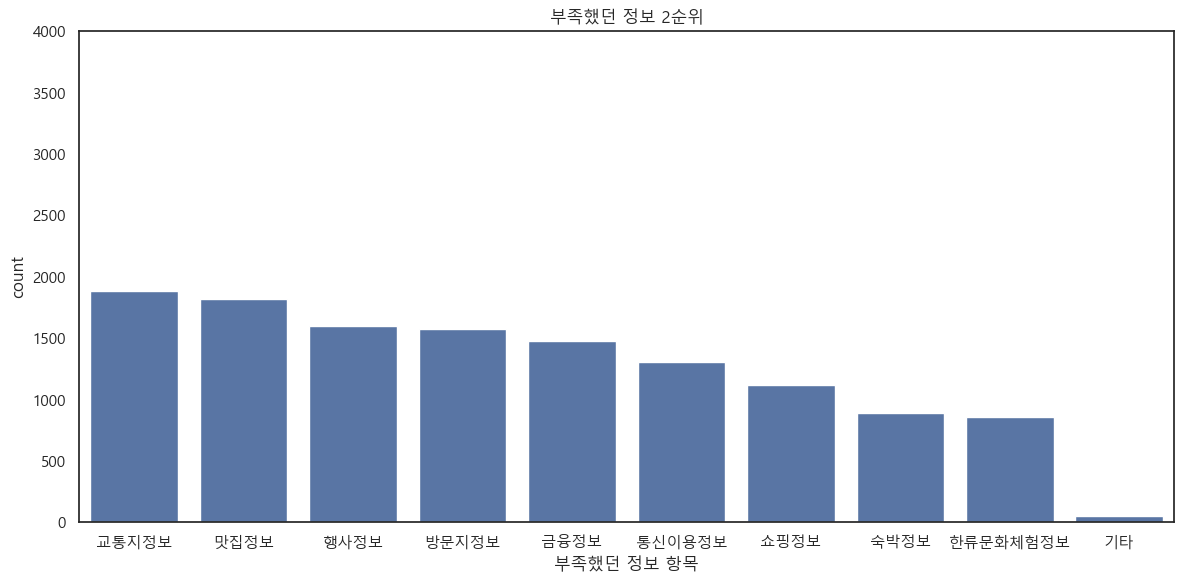

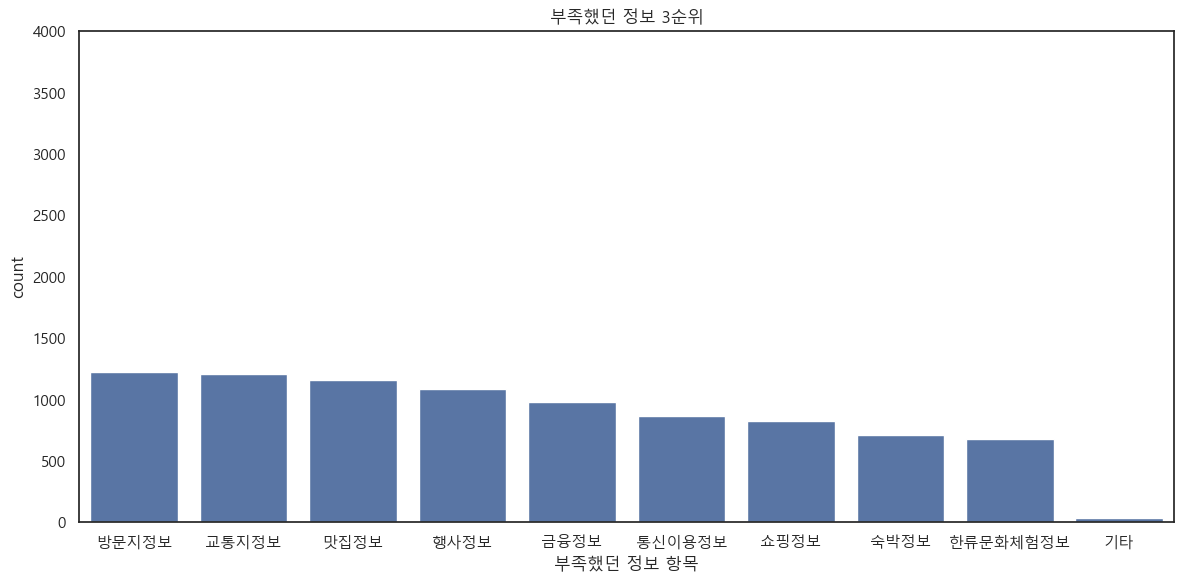

In [5]:
# 정보부족
lackinfo_rename = {
    1 : '방문지정보',
    2 : '교통지정보',
    3 : '맛집정보',
    4 : '쇼핑정보',
    5 : '숙박정보',
    6 : '행사정보',
    7 : '한류문화체험정보',
    8 : '금융정보',
    9 : '통신이용정보',
    10 : '기타',
    11: '없다'
}
d34['lack_info1'] = d34['lack_info1'].replace(lackinfo_rename)
d34['lack_info2'] = d34['lack_info2'].replace(lackinfo_rename)
d34['lack_info3'] = d34['lack_info3'].replace(lackinfo_rename)

print(d34['lack_info1'].value_counts())
print(d34['lack_info2'].value_counts())
print(d34['lack_info3'].value_counts())

mpl.rcParams['font.family'] = ['Malgun Gothic']
mpl.rcParams['font.sans-serif'] = ['Malgun Gothic']
mpl.rcParams['axes.unicode_minus'] = False
sns.set(style="white", font='Malgun Gothic', rc={'axes.unicode_minus':False})

sns.countplot(x='lack_info1', data=d34, order=d34['lack_info1'].value_counts().index)
plt.title("부족했던 정보 1순위", fontname='Malgun Gothic')
plt.xlabel("부족했던 정보 항목", fontname='Malgun Gothic')
plt.ylim(0, 4000)
plt.tight_layout()
plt.show()

sns.countplot(x='lack_info2', data=d34, order=d34['lack_info2'].value_counts().index)
plt.title("부족했던 정보 2순위", fontname='Malgun Gothic')
plt.xlabel("부족했던 정보 항목", fontname='Malgun Gothic')
plt.ylim(0, 4000)
plt.tight_layout()
plt.show()

sns.countplot(x='lack_info3', data=d34, order=d34['lack_info3'].value_counts().index)
plt.title("부족했던 정보 3순위", fontname='Malgun Gothic')
plt.xlabel("부족했던 정보 항목", fontname='Malgun Gothic')
plt.ylim(0, 4000)
plt.tight_layout()
plt.show()

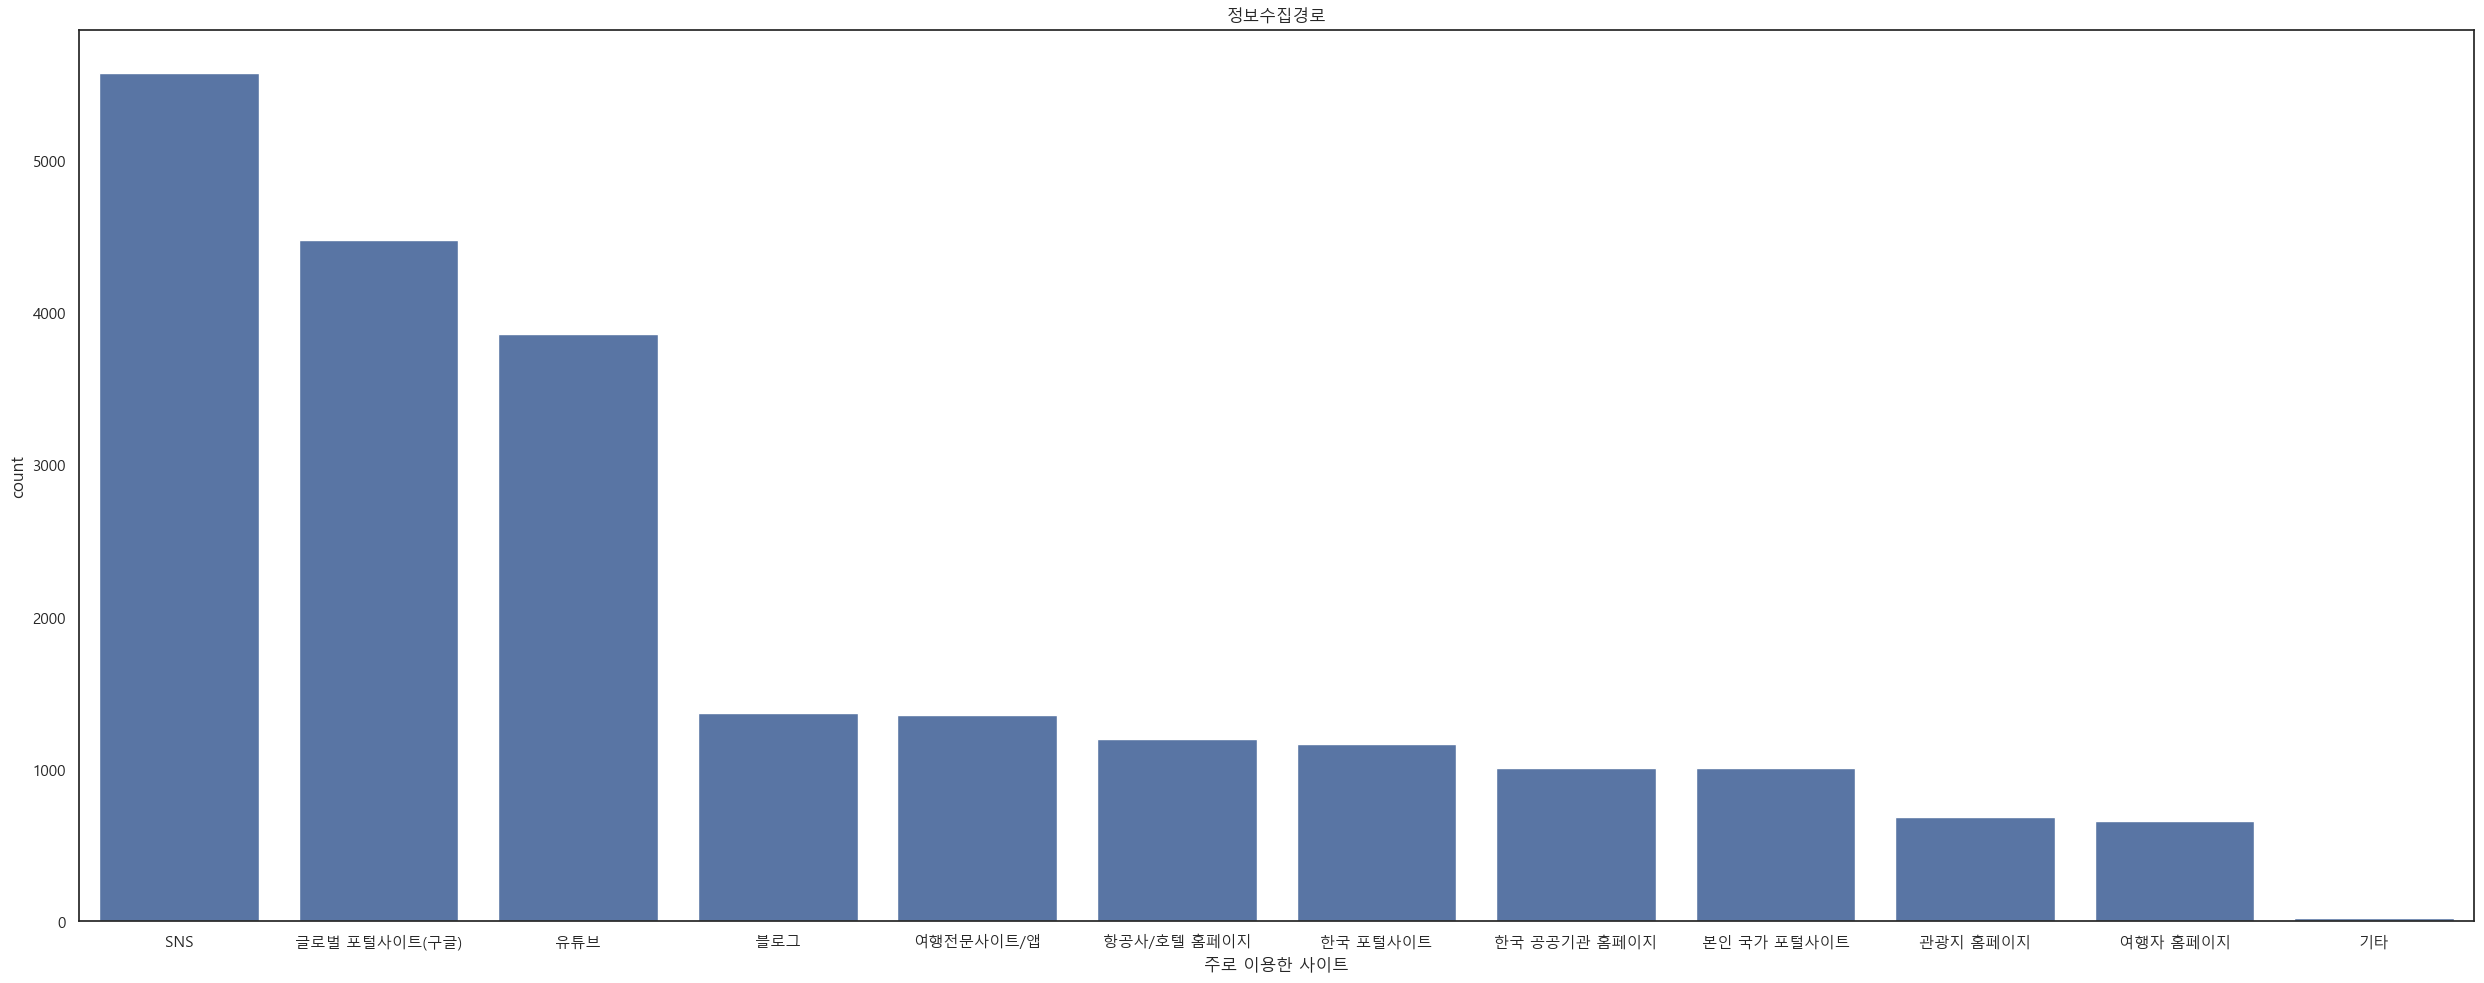

In [6]:
# 주로 이용한 사이트 (collect_site)
# 1	글로벌 포털사이트 (구글 등)
# 2	한국 포털사이트 (네이버, 다음 등)
# 3	본인 국가의 포털사이트 (Yahoo japan, Baidu 등)
# 4	여행전문사이트 또는 앱(트립어드바이저, Hotels.com 숙박 예약 사이트 등)
# 5	소셜미디어 (페이스북, 인스타그램, 트위터, 웨이보 등)
# 6	동영상 사이트 (유튜브 등)
# 7	여행 관련 블로그
# 8	여행사 홈페이지
# 9	개별 관광지 홈페이지
# 10	항공사/호텔 홈페이지
# 11	한국 공공기관 홈페이지(한국관광공사(VisitKorea), 대사관, 무역관 등)
# 12	기타
d34['collect_site'].value_counts()
collect_site_rename = {
    1 : '글로벌 포털사이트(구글)',
    2 : '한국 포털사이트',
    3 : '본인 국가 포털사이트',
    4 : '여행전문사이트/앱',
    5 : 'SNS',
    6 : '유튜브',
    7 : '블로그',
    8 : '여행자 홈페이지',
    9 : '관광지 홈페이지',
    10 : '항공사/호텔 홈페이지',
    11 : '한국 공공기관 홈페이지',
    12 : '기타'
}

d34['collect_site'] = d34['collect_site'].replace(collect_site_rename)
d34['collect_site'].value_counts()

plt.figure(figsize=(25,10))
sns.countplot(x='collect_site', data=d34, order=d34['collect_site'].value_counts().index)
plt.title("정보수집경로", fontname='Malgun Gothic')
plt.xlabel("주로 이용한 사이트", fontname='Malgun Gothic')
plt.tight_layout()
plt.show()

activity
쇼핑            4944
식도락           3891
자연경관          2893
전통문화체험        2097
유적지방문         1636
공연장/촬영장 방문    1384
박물관           1288
뷰티/미용         1267
놀이공원          1247
치료/건강검진        982
공연관람           914
클럽/카지노         588
스포츠 관람         380
지역축제참여         259
기타             252
스포츠 참가         119
알수없음            89
Name: count, dtype: int64


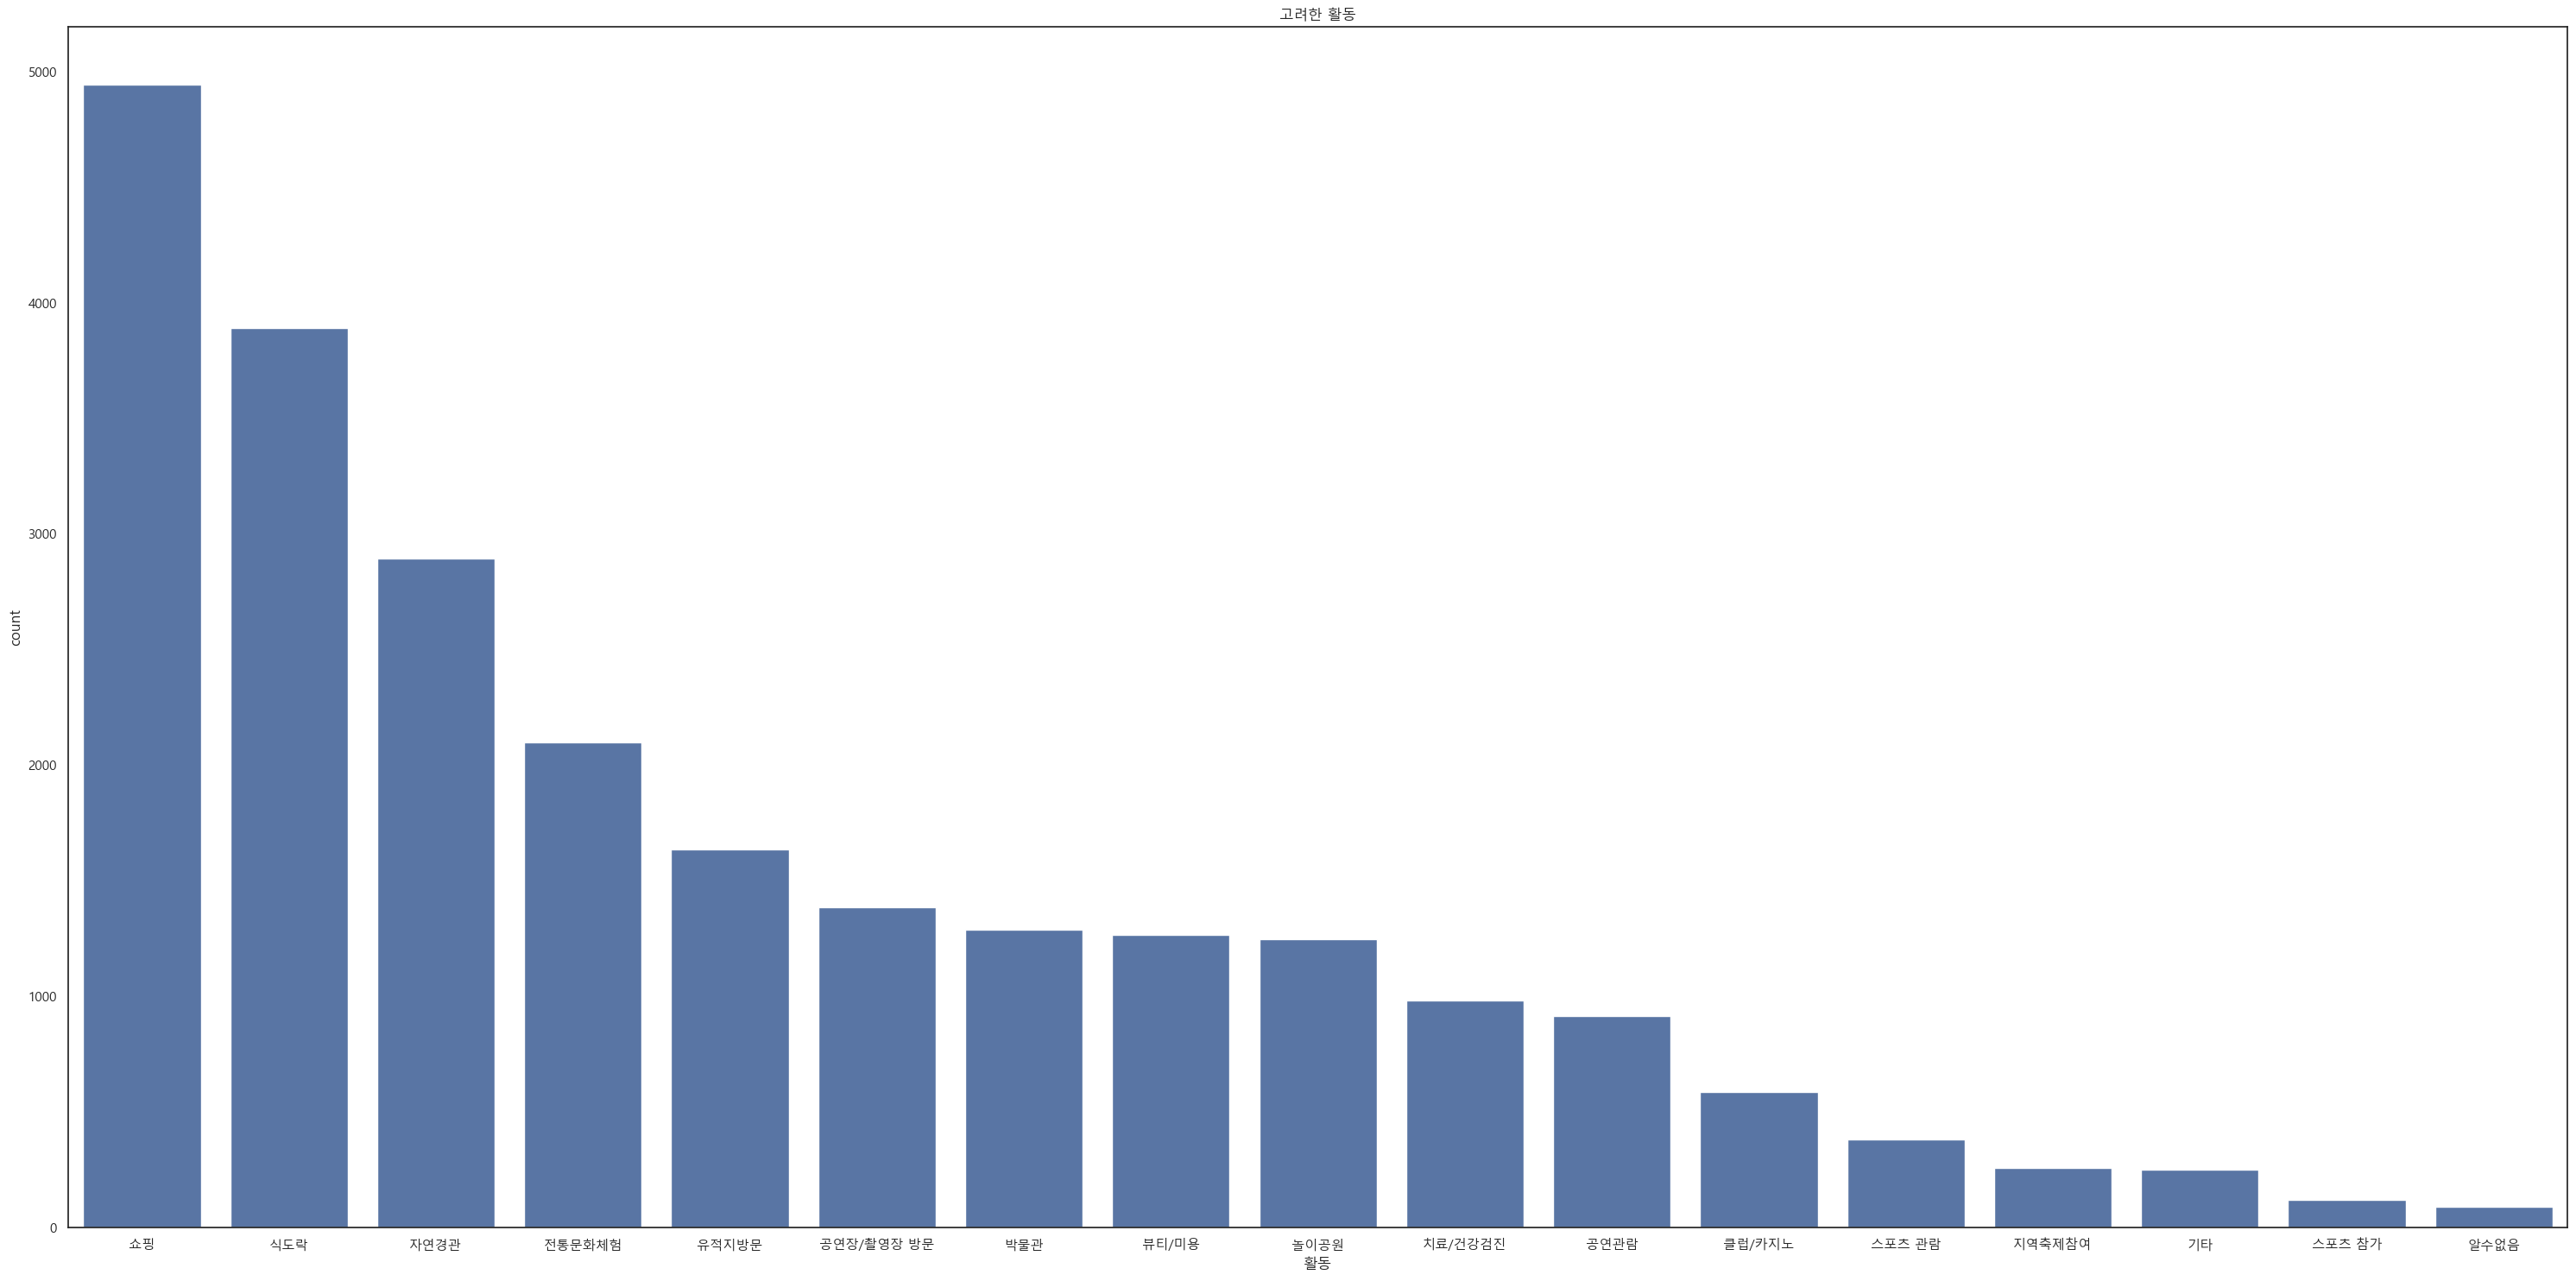

In [22]:
# 고려한 활동
print(d34['activity'].value_counts())

activity_rename = {
    1 : '음식',
    2 : '쇼핑',
    3 : '자연경관',
    4 : '유적지방문',
    5 : '전통문화체험',
    6 : '박물관',
    7 : '공연장/촬영장 방문',
    8 : '공연관람',
    9 : '지역축제참여',
    10 : '클럽/카지노',
    11 : '놀이공원',
    12 : '뷰티/미용',
    13 : '치료/건강검진',
    14 : '스포츠 관람',
    15 : '스포츠 참가',
    16 : '기타',
    17 : '알수없음'
}

d34['activity'] = d34['activity'].replace(activity_rename)
d34['activity'].value_counts()

plt.figure(figsize=(30,15))
sns.countplot(x='activity', data=d34, order=d34['activity'].value_counts().index)
plt.title("고려한 활동", fontname='Malgun Gothic')
plt.xlabel("활동", fontname='Malgun Gothic')
plt.tight_layout()
plt.show()

In [ ]:
# 고려했던 활동과 실제로 참여했던 활동이 어떻게 다른지 확인
# 매핑: 변수명 → 번호 (중복 응답했던 사람들 때문에 이렇게 넣어놨구나..)
part_map = {
    "part_food": 1,
    "part_shop": 2,
    "part_nature": 3,
    "part_history": 4,
    "part_tradition": 5,
    "part_gallery": 6,
    "part_kpop": 7,
    "part_performance": 8,
    "part_festival": 9,
    "part_fun": 10,
    "part_entertainment": 11,
    "part_beauty": 12,
    "part_heal": 13,
    "part_sport_view": 14,
    "part_sport_part": 15,
    "part_conference": 16,
    "part_business": 17,
    "part_study": 18,
    "part_etc": 19
}

# participant 컬럼 생성
d34['participant'] = d34.apply(
    lambda row: [part_map[col] for col in part_map if row[col] >= 1],
    axis=1
)

d34['participant'].head()
d34.head()

,revisit_num,satis_overall,satis_food,satis_shop,satis_nature,satis_history,satis_tradition,satis_gallery,satis_kpop,satis_performance,...,collect_site,info_collect,infra,activity,type,main_purpose,interest1,interest2,interest3,participant
0,4,5,5.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,...,한국 포털사이트,1.0,6.0,식도락,1,1,2.0,3.0,4.0,"[1, 2, 8]"
1,4,5,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,유튜브,3.0,3.0,자연경관,1,2,2.0,9.0,7.0,"[2, 3, 11]"
2,2,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,1,5,NaN,NaN,NaN,[1]
3,1,5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,1,3,NaN,NaN,NaN,"[4, 15, 16]"
4,3,4,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,4.0,3.0,쇼핑,1,2,8.0,3.0,7.0,"[1, 2, 4]"


              category  code  value  count
0            part_food     1    1.0  23477
1            part_shop     2    2.0  25800
2          part_nature     3    3.0  18146
3         part_history     4    4.0  10401
4       part_tradition     5    5.0  10833
5         part_gallery     6    6.0   8144
6            part_kpop     7    7.0   6051
7     part_performance     8    8.0   2492
8        part_festival     9    9.0   1523
9             part_fun    10   10.0   3141
10  part_entertainment    11   11.0   5068
11         part_beauty    12   12.0   4204
12           part_heal    13   13.0   2610
13     part_sport_view    14   14.0   1279
14     part_sport_part    15   15.0   1079
15     part_conference    16   16.0   1149
16       part_business    17   17.0   3262
17          part_study    18   18.0   3564
18            part_etc    19   16.0      1
19            part_etc    19   17.0      4
20            part_etc    19   19.0   1107


C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_24452\3538280085.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x='category_kor', y='count', palette='RdBu')


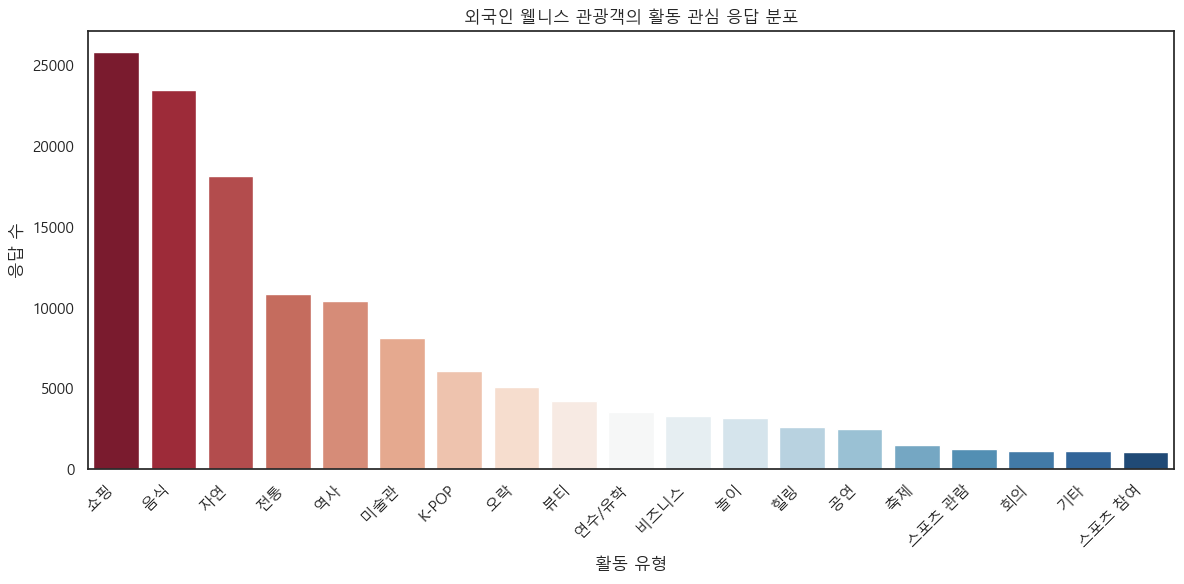

In [ ]:
# 참여한 activity 수
import pandas as pd

# 변수명과 번호 매핑
part_map = {
    "part_food": 1,
    "part_shop": 2,
    "part_nature": 3,
    "part_history": 4,
    "part_tradition": 5,
    "part_gallery": 6,
    "part_kpop": 7,
    "part_performance": 8,
    "part_festival": 9,
    "part_fun": 10,
    "part_entertainment": 11,
    "part_beauty": 12,
    "part_heal": 13,
    "part_sport_view": 14,
    "part_sport_part": 15,
    "part_conference": 16,
    "part_business": 17,
    "part_study": 18,
    "part_etc": 19
}

# 빈 리스트에 결과 저장
count_list = []

for col, num in part_map.items():
    count = d34[col].value_counts().sort_index()
    for val, cnt in count.items():
        count_list.append({
            'category': col,
            'code': num,
            'value': val,
            'count': cnt
        })

# 결과 DataFrame 생성
part_counts_df = pd.DataFrame(count_list)

# 보기 좋게 정렬
part_counts_df = part_counts_df.sort_values(by=['code', 'value']).reset_index(drop=True)

# 출력
print(part_counts_df)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 원본 데이터프레임
df = pd.DataFrame({
    "category": ["part_food", "part_shop", "part_nature", "part_history", "part_tradition",
                 "part_gallery", "part_kpop", "part_performance", "part_festival", "part_fun",
                 "part_entertainment", "part_beauty", "part_heal", "part_sport_view", "part_sport_part",
                 "part_conference", "part_business", "part_study", "part_etc", "part_etc", "part_etc"],
    "code": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,19,19],
    "value": [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,16.0,17.0,19.0],
    "count": [23477,25800,18146,10401,10833,8144,6051,2492,1523,3141,5068,4204,2610,1279,1079,1149,3262,3564,1,4,1107]
})

# 동일 category ('part_etc') 중복 합치기
df_grouped = df.groupby(['category']).agg({'count': 'sum'}).reset_index()

# 보기 좋은 한글 라벨 매핑
labels_kor = {
    "part_food": "음식",
    "part_shop": "쇼핑",
    "part_nature": "자연",
    "part_history": "역사",
    "part_tradition": "전통",
    "part_gallery": "미술관",
    "part_kpop": "K-POP",
    "part_performance": "공연",
    "part_festival": "축제",
    "part_fun": "놀이",
    "part_entertainment": "오락",
    "part_beauty": "뷰티",
    "part_heal": "힐링",
    "part_sport_view": "스포츠 관람",
    "part_sport_part": "스포츠 참여",
    "part_conference": "회의",
    "part_business": "비즈니스",
    "part_study": "연수/유학",
    "part_etc": "기타"
}
df_grouped['category_kor'] = df_grouped['category'].map(labels_kor)

# 카테고리별 응답 수 정렬
df_sorted = df_grouped.sort_values(by='count', ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x='category_kor', y='count', palette='RdBu')

plt.title('외국인 웰니스 관광객의 활동 관심 응답 분포')
plt.xlabel('활동 유형')
plt.ylabel('응답 수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [26]:
# 웰니스와 일반 관광객 구분

In [ ]:
# 소비 (general)


In [ ]:
# 소비 (웰니스 vs general)

In [28]:
# 만족도 (general)


In [ ]:
# 만족도 (웰니스 vs general)